In [12]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.layers import Reshape
import seaborn
import sklearn
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import glob
import wave

In [3]:
# Load the tram and car audio datasets
# Use glob to find all the files matching the pattern "*.wav" in the current directory
carTrain = glob.glob("cars_train/*.wav")
tramTrain = glob.glob("trams_train/*.wav")

carTest = glob.glob("cars_test/*.wav")
tramTest = glob.glob("trams_test/*.wav")


dataset=[]
labels = []


In [4]:
# Function to import audio files
def importFiles(files, label):
    dataset = []
    labels = []
    # Loop through the list of files
    for file in files:
        # Open the file using the wave module
       # wav = wave.open(file, "rb")
        #wav = wave.open(file, "rb")
        # Read the audio data from the file
        #data = wav.readframes(wav.getnframes())
        data,sr = librosa.load(file)
        data = librosa.effects.trim(data, top_db=20, frame_length=1024, hop_length=512)[0] 
        # Normalize the audio data to have a maximum length of 5 seconds 
        data = librosa.util.fix_length(data, sr * 5)
        #data = scipy.io.wavfile.read(wav)
        # Append the audio data to the list
        labels.append(label)
        dataset.append(data)

    return dataset,labels

In [5]:
car_dataset, car_label  = importFiles(carTrain, 0)
tram_dataset, tram_label = importFiles(tramTrain, 1)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11788\665679542.py:15: FutureWarning: Pass size=110250 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.util.fix_length(data, sr * 5)


In [6]:
car_test_dataset, car_test_label = importFiles(carTest, 0)
tram_test_dataset, tram_test_label = importFiles(tramTest, 1)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11788\665679542.py:15: FutureWarning: Pass size=110250 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.util.fix_length(data, sr * 5)


In [7]:
print(len(car_label))
# Concatenate the two datasets
dataset = tf.concat([tram_dataset, car_dataset], axis=0)
labels = tf.concat([tram_label, car_label], axis=0)

eval_dataset = tf.concat([tram_test_dataset,car_test_dataset], axis=0) 
eval_labels = tf.concat([tram_test_label, car_test_label ], axis=0) 


#dataset = tf.expand_dims(dataset, axis=2)
#print(dataset.shape)

229


In [13]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


features of a tram sample:


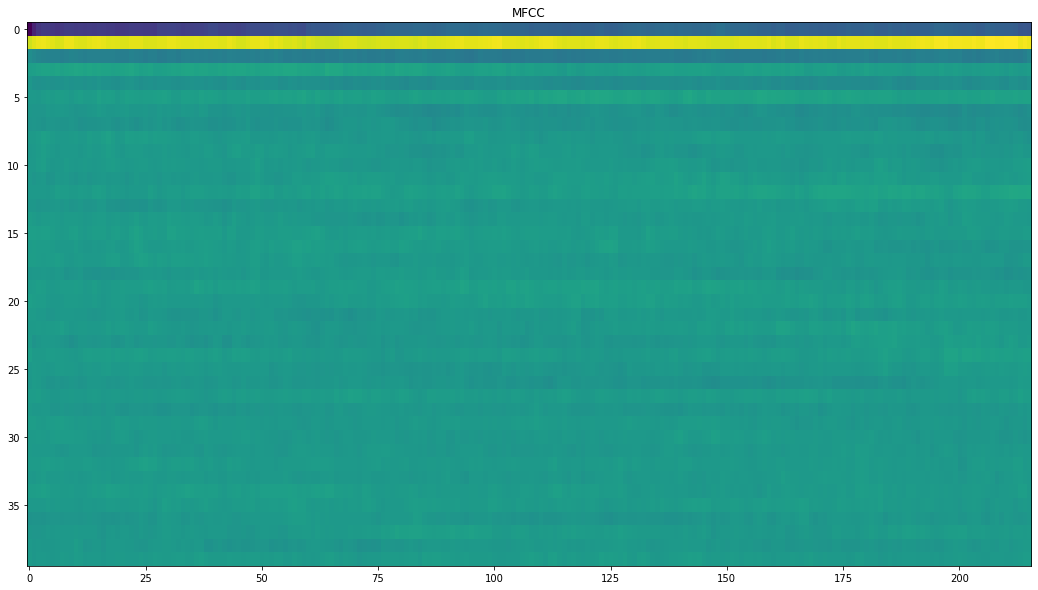

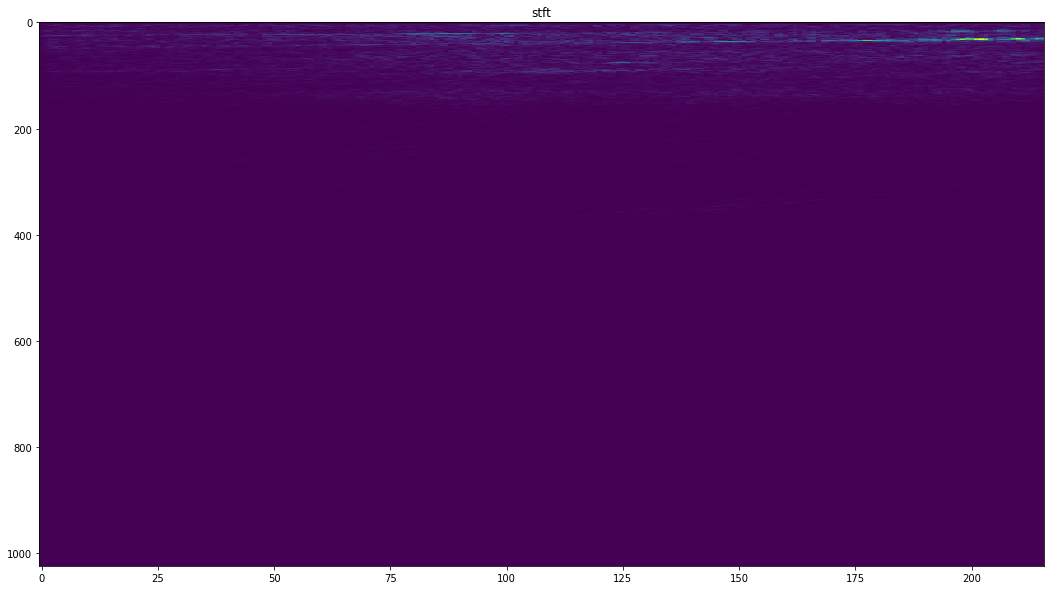

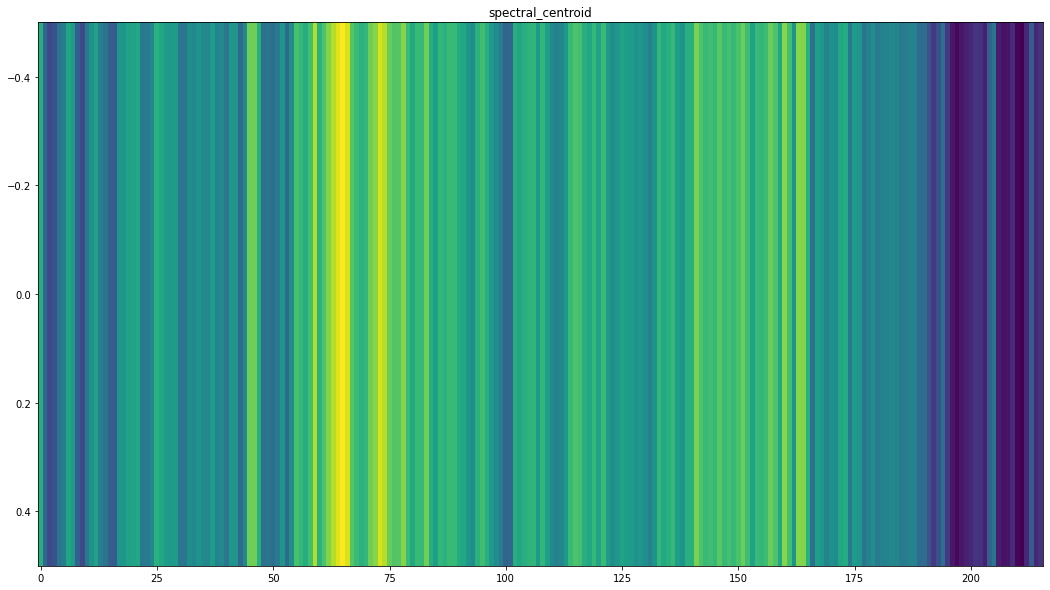

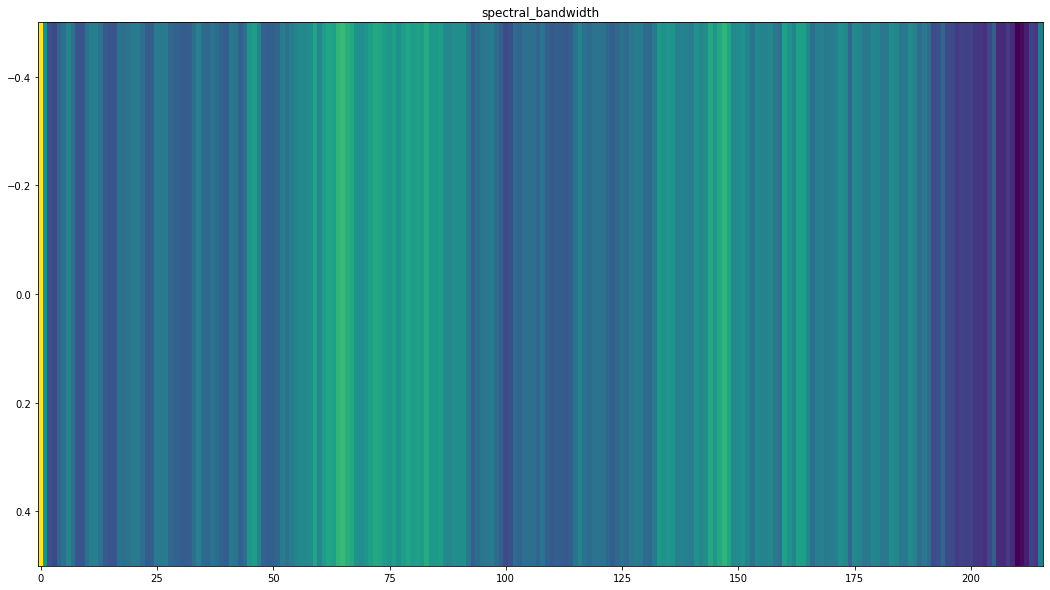

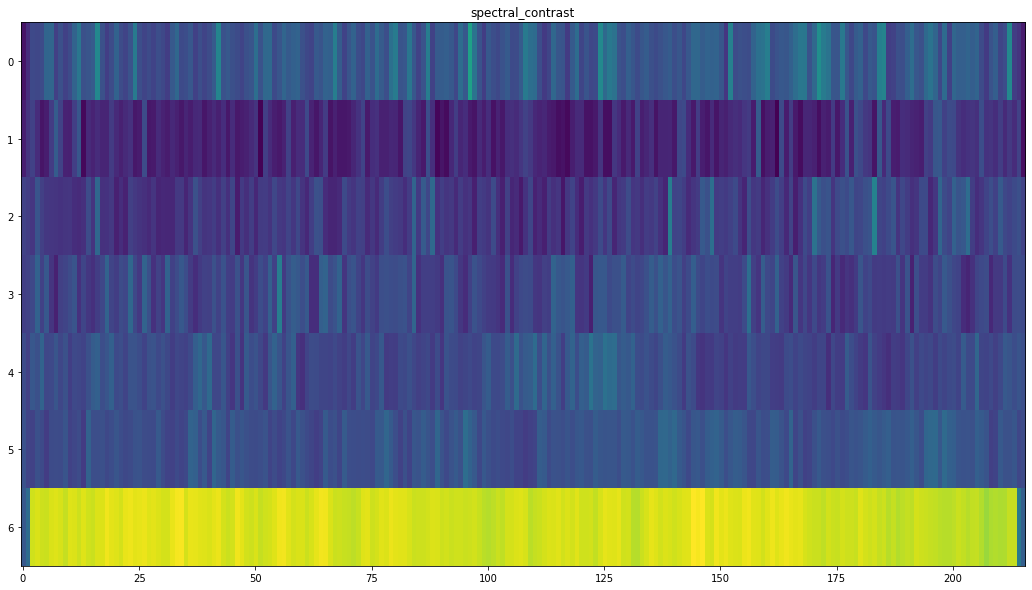

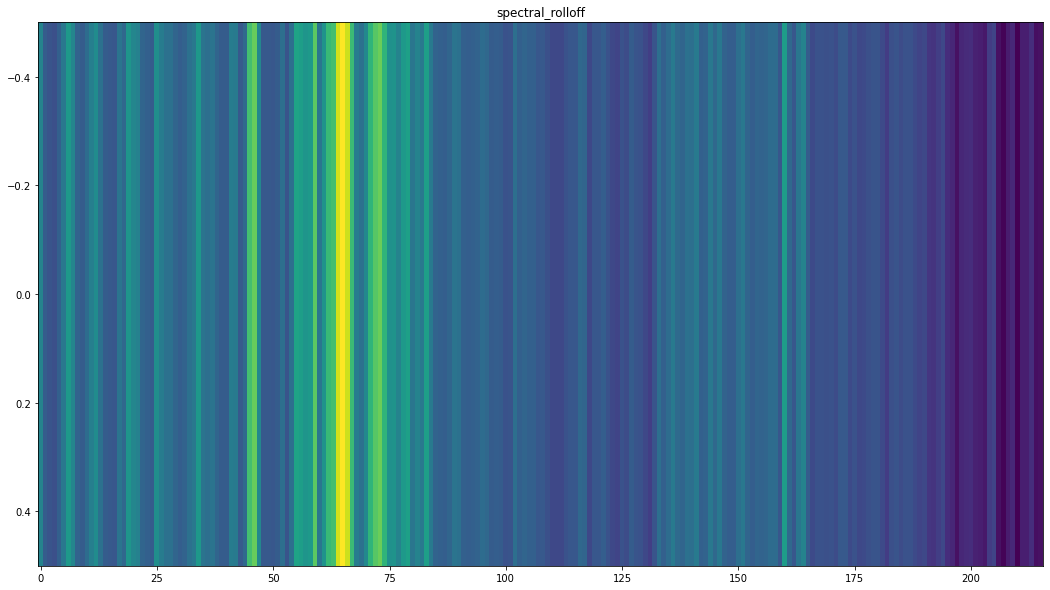

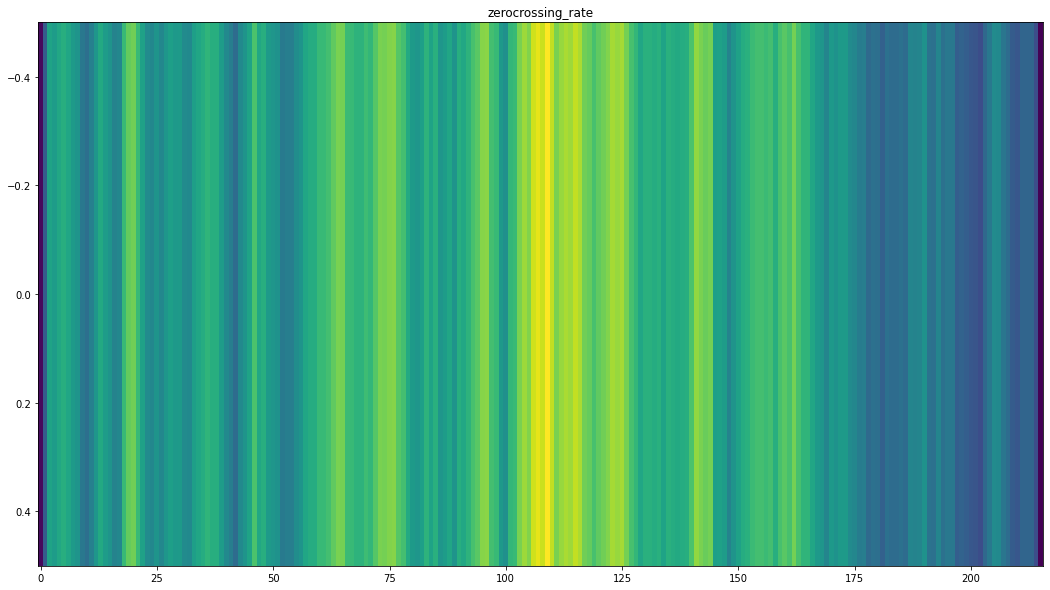


features of a car sample:


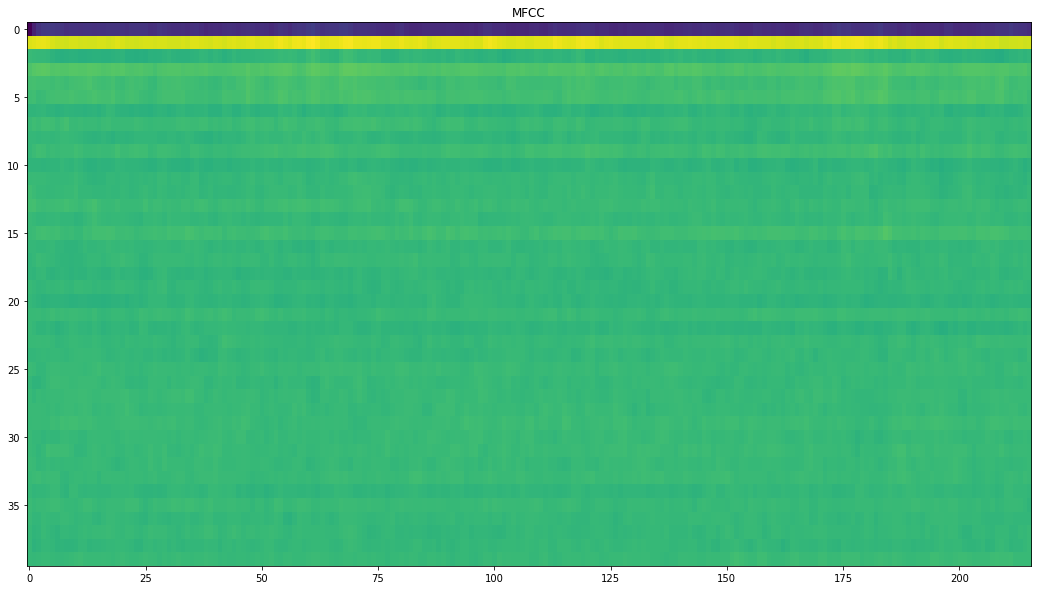

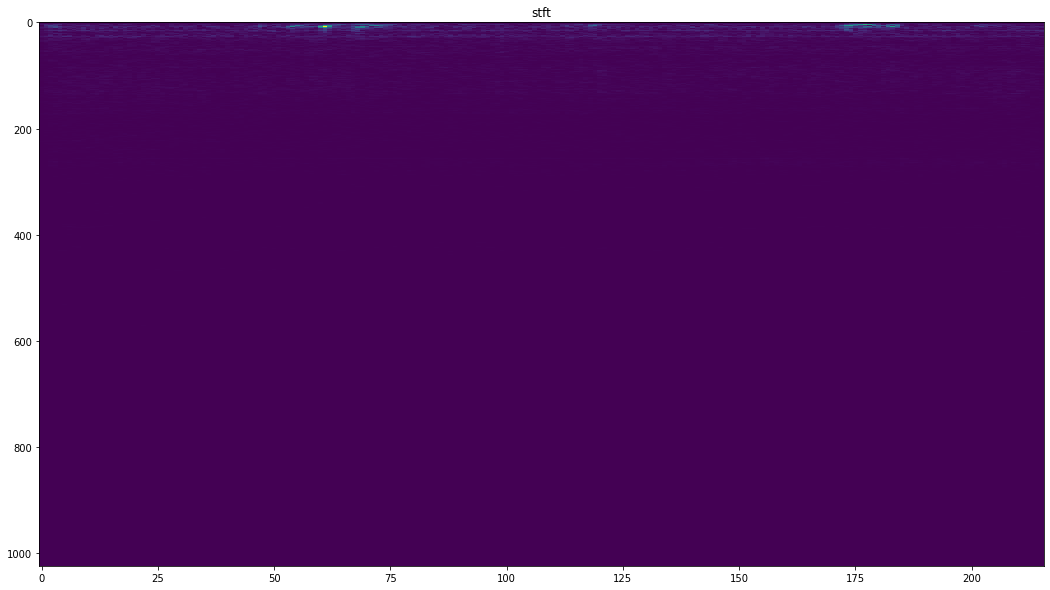

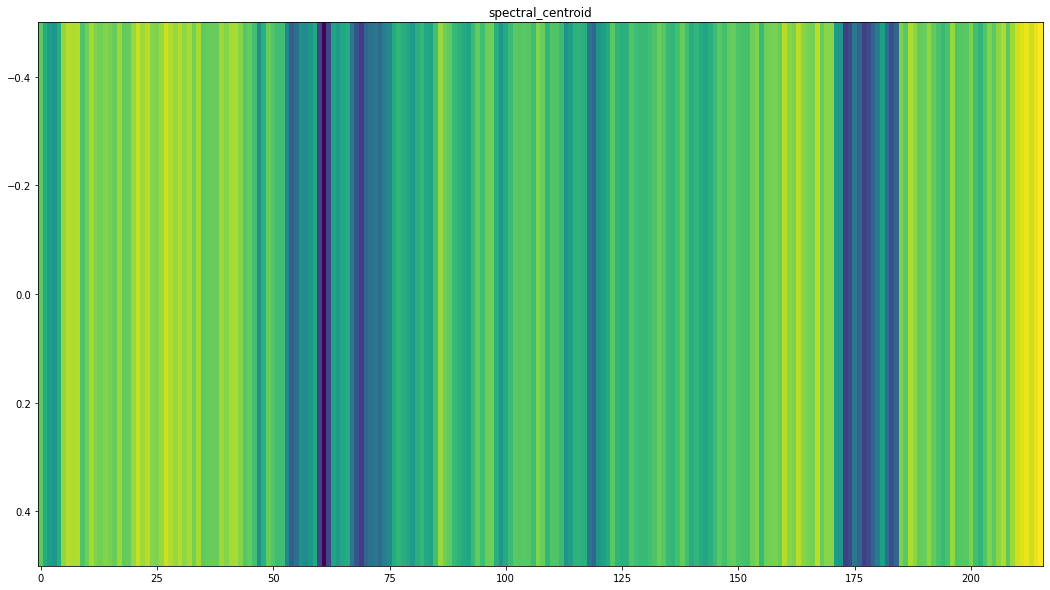

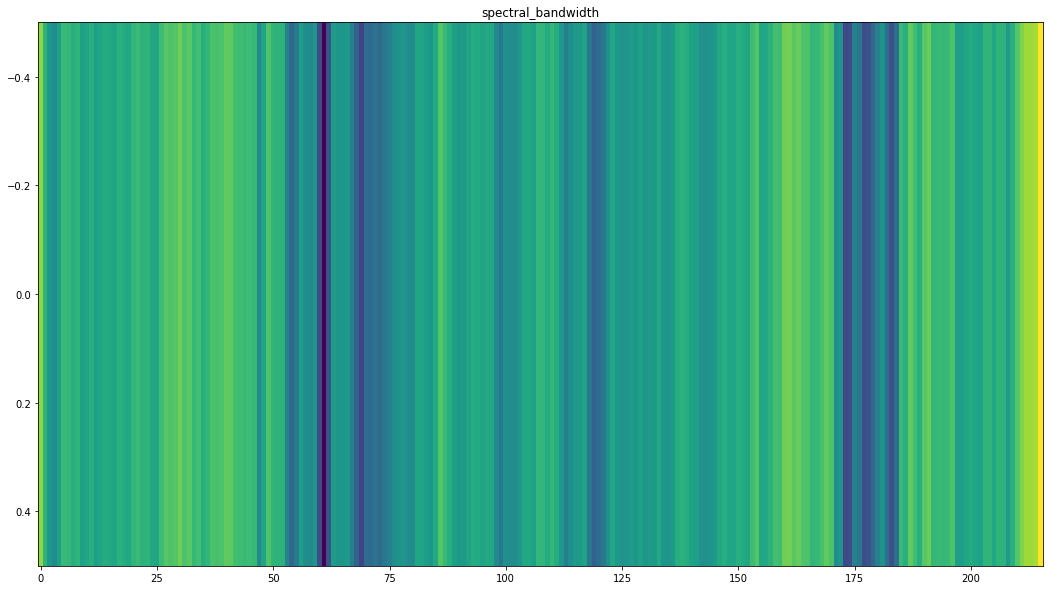

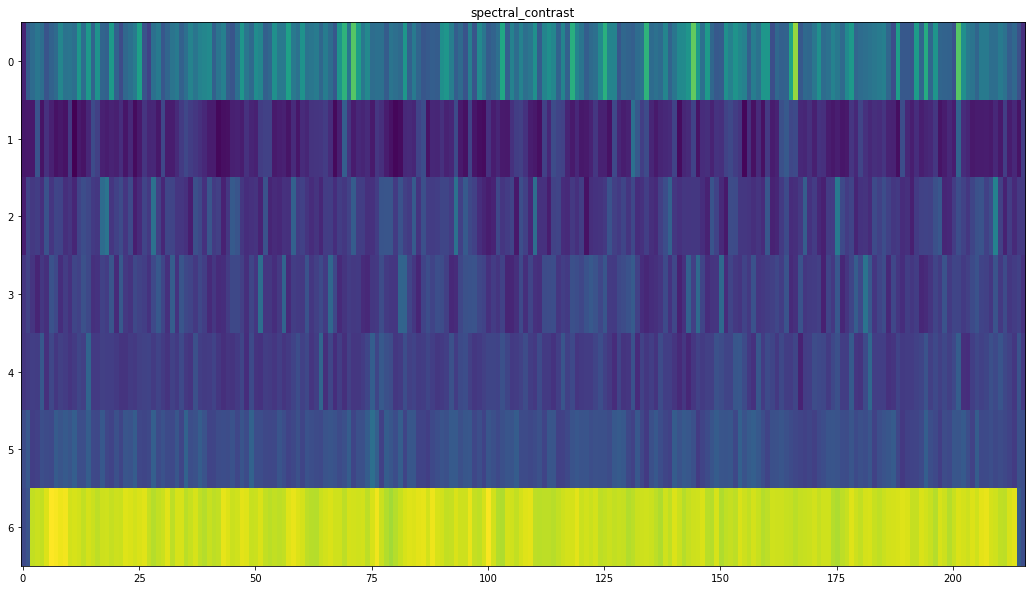

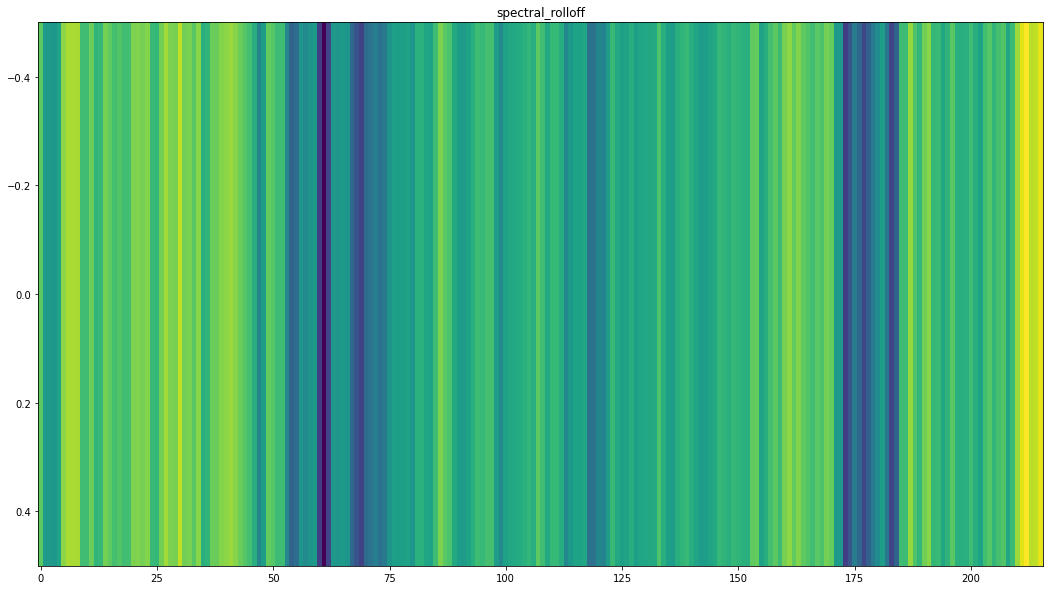

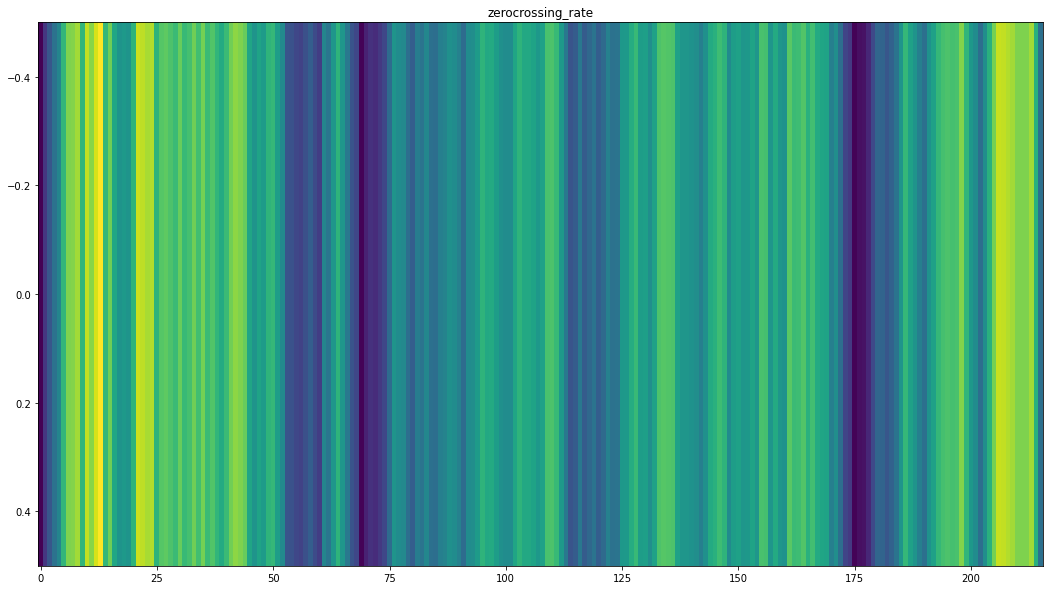

In [39]:
fs = 44000
i=0
features=[]


# test_features=[]
# train_features=[]

# train_labels =[]
# test_labels =[]


for audio in dataset:
    # extract mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=np.asarray(audio), sr=fs, n_mfcc=40)
    stft = np.abs(librosa.stft(np.asarray(audio)))
    features.append(mfccs)
    # if(i % 3 == 0):
    #     test_features.append(mfccs)
    #     test_labels.append(labels[i])
    # else:
    #     train_features.append(mfccs)
    #     train_labels.append(labels[i])
        
    i += 1   
    # extract spectral centroid (a measure of spectral energy)
    spectral_centroid = librosa.feature.spectral_centroid(y=np.asarray(audio), sr=fs)

    # extract spectral bandwidth (a measure of spectral spread)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=np.asarray(audio), sr=fs)

    # extract spectral contrast (a measure of spectral density)
    spectral_contrast = librosa.feature.spectral_contrast(y=np.asarray(audio), sr=fs)

    # extract spectral rolloff (a measure of the frequency below which a certain percentage of the power spectrum is concentrated)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=np.asarray(audio), sr=fs)

    # extract zerocrossing rate (a measure of the rate of sign-changes in the audio signal)
    zerocrossing_rate = librosa.feature.zero_crossing_rate(y=np.asarray(audio))

    if(i==1 or i==400):
        name=""
        if(labels[i] == 0):
            name = "car"
        else:
            name = "tram"

        print("\nfeatures of a "+name+" sample:")
        plt.figure(figsize=(18, 10))
        plt.title("MFCC")
        plt.imshow(mfccs, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("stft")
        plt.imshow(stft, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("spectral_centroid")
        plt.imshow(spectral_centroid, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("spectral_bandwidth")
        plt.imshow(spectral_bandwidth, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("spectral_contrast")
        plt.imshow(spectral_contrast, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("spectral_rolloff")
        plt.imshow(spectral_rolloff, interpolation="nearest", aspect='auto')

        plt.figure(figsize=(18, 10))
        plt.title("zerocrossing_rate")
        plt.imshow(zerocrossing_rate, interpolation="nearest", aspect='auto')

        plt.show()

In [42]:
eval_features = []
i = 0

for audio in eval_dataset:
    # extract mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=np.asarray(audio), sr=fs, n_mfcc=40)
    #stft = np.abs(librosa.stft(np.asarray(audio)))
    eval_features.append(mfccs) 
    i += 1  

In [43]:
# Define the CNN model
model = Sequential()
#print(np.shape(train_features))
model.add(Conv2D(4, (21, 21), activation='relu', input_shape=(40,216,1)))
model.add(MaxPooling2D((5, 5)))
# model.add(Conv2D(8, (5, 5), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Define the model
# model = tf.keras.Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=(None, 216, 1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential()

# # Add a Reshape layer to convert the input data to the correct shape
# model.add(Reshape((128, 128, 1), input_shape=(110250,)))

# # Add a Conv2D layer with 32 filters, a kernel size of 3x3, and a ReLU activation function
# model.add(Conv2D(32, (3, 3), activation='relu'))

# # Add a MaxPooling2D layer with a pool size of 2x2
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add a Flatten layer to flatten the input data to a 1D array
# model.add(Flatten())

# # Add a Dense layer with 32 units and a ReLU activation function
# model.add(Dense(32, activation='relu'))

# # Add a Dense layer with 1 unit and a sigmoid activation function
# model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 20, 196, 4)        1768      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 39, 4)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 37, 16)         592       
                                                                 
 flatten_1 (Flatten)         (None, 1184)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                18960     
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                      

In [44]:
# train_features=  tf.expand_dims(train_features,axis=3)
print(np.shape(features[0]))
features=  tf.expand_dims(features,axis=3)



(40, 216)


In [45]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="BinaryCrossentropy", metrics=['accuracy'],)

In [46]:
def printname():
    print("success")

In [47]:
# train_labels=tf.convert_to_tensor(np.array(train_labels))
# test_labels=tf.convert_to_tensor(np.array(test_labels))
lables =tf.convert_to_tensor(np.array(labels))
# print(type(train_labels))
# print(type(train_features))
# print(np.shape(test_labels))
#test_features=  tf.expand_dims(test_features,axis=3)
#print(np.shape(test_features))

In [48]:
# Train the model on the dataset
#print(len(train_labels))
#print(len(train_features))
#train_features=  tf.expand_dims(train_features,axis=3)
#print(np.shape(train_features))
#model.fit(train_features,test_features,epochs=10)
breakpoint()
#history = model.fit(train_features, train_labels, epochs=10, callbacks = printname())
history = model.fit(x=features,y=labels,batch_size=10 ,epochs=100, callbacks = printname(),validation_split=0.2,shuffle=True)

success
Epoch 1/100
36/36 [==============================] - 3s 68ms/step - loss: 0.6106 - accuracy: 0.7753 - val_loss: 0.4608 - val_accuracy: 0.8111
Epoch 2/100
36/36 [==============================] - 2s 66ms/step - loss: 0.1283 - accuracy: 0.9635 - val_loss: 0.9013 - val_accuracy: 0.7333
Epoch 3/100
36/36 [==============================] - 2s 61ms/step - loss: 0.0539 - accuracy: 0.9860 - val_loss: 0.1054 - val_accuracy: 0.9778
Epoch 4/100
36/36 [==============================] - 2s 68ms/step - loss: 0.0313 - accuracy: 0.9944 - val_loss: 0.1859 - val_accuracy: 0.9333
Epoch 5/100
36/36 [==============================] - 3s 72ms/step - loss: 0.0306 - accuracy: 0.9916 - val_loss: 0.0435 - val_accuracy: 0.9889
Epoch 6/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0242 - accuracy: 0.9944 - val_loss: 0.2711 - val_accuracy: 0.8778
Epoch 7/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0495 - accuracy: 0.9860 - val_loss: 0.0548 - val_accuracy: 0.988

In [49]:
#print(np.shape(test_features))
out1= model.predict(features)
print(out1)

14/14 [==============================] - 1s 30ms/step
[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99557197e-01]
 [9.99815464e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.000000

In [50]:
eval_labels=tf.convert_to_tensor(np.array(eval_labels))

In [51]:
eval_features =  tf.expand_dims(eval_features, axis=3)

In [52]:
scores = model.evaluate(eval_features, eval_labels, verbose=0)
print(scores)

[0.043138906359672546, 0.9800000190734863]


In [53]:
model.save_weights('./model_weights')
model.load_weights('./model_weights')